# Proyek Analisi Data: Bike Sharing Dataset

- **Nama:** Azis Marwadin
- **Email:** azismarwadin.sem3@gmail.com
- **ID Dicoding:** azis_marwadin



## Menentukan Pertanyaan Bisnis

- Pada musim apa tingkat penyewaan dititik terendahnya?
- Bagaimana jumlah pengguna sepeda pada tahun 2011, meningkat atau menurun ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('Data/day.csv') #membaca dataset day ke variable day_df
hour_df = pd.read_csv('Data/hour.csv') #membaca dataset hour ke variable hour_df

In [3]:
day_df.head() #menampilkan 5 baris pertama dataset day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df.head() #menampilkan 5 baris pertama dataset hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [5]:
day_df.info() #menampilkan informasi dataset day_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.describe() #menampilkan deskripsi dataset day_df

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
day_df.isna().sum() #menampilkan jumlah missing value dataset day_df

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum()) #mengecek duplikasi dataset day_df

Jumlah duplikasi:  0


In [9]:
hour_df.head() #menampilkan 5 baris pertama dataset hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
hour_df.info() #menampilkan informasi dataset hour_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour_df.describe() #menampilkan deskripsi dataset hour_df

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [12]:
hour_df.isna().sum() #mengecek missing value dataset hour_df

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum()) #mengecek duplikasi dataset hour_df

Jumlah duplikasi:  0


**Insight:**
- Dari dataset day_df tidak mengandung missing value, duplikasi dan inaccurate value
- Dari dataset hour_df juga tidak mengandung missing value, duplikasi dan inaccurate value

### Cleaning Data

In [14]:
# Mengganti nama kolom
day_df.rename(columns={
    "mnth": "bulan",
    "season": "musim",
    "yr": "tahun",
    "cnt": "total"
}, inplace=True
)

# Mengganti nama musim
day_df["musim"] = day_df["musim"].replace({1: "Semi", 2: "Panas", 3: "Gugur", 4: "Dingin"})

# Mengganti nama bulan
day_df["bulan"] = day_df["bulan"].replace({1: "Januari", 2: "Februari", 3: "Maret", 4: "April", 5: "Mei", 6: "Juni", 7: "Juli", 8: "Agustus", 9: "September", 10: "Oktober", 11: "November", 12: "Desember"})

# Mengganti tahun
day_df["tahun"] = day_df["tahun"].replace({0: "2011", 1: "2012"})

**Insight:**
- Dari semua dataset tidak mengandung missing value, duplikasi dan inaccurate value maka data yang dihasilkan tidak ada data yang kotor

## Exploratory Data Analysis (EDA)

### Explore

In [15]:
day_df.describe(include="all") #menampilkan semua deskripsi dataset day_df

,instant,dteday,musim,tahun,bulan,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
count,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,2,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,Gugur,2012,Januari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,366,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,NaN,NaN,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [16]:
hour_df.describe(include="all") #menampilkan semua deskripsi dataset hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [17]:
day_df.groupby(by="musim").total.sum().sort_values(ascending=False).reset_index().head(10) #menghitung total per musim yang paling banyak

,musim,total
0,Gugur,1061129
1,Panas,918589
2,Dingin,841613
3,Semi,471348


In [18]:
day_df.groupby(by="bulan").total.sum().sort_values(ascending=False).reset_index().head(12) #menghitung total per bulan yang paling banyak

,bulan,total
0,Agustus,351194
1,Juni,346342
2,September,345991
3,Juli,344948
4,Mei,331686
5,Oktober,322352
6,April,269094
7,November,254831
8,Maret,228920
9,Desember,211036


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Pada musim apa tingkat penyewaan dititik terendahnya?

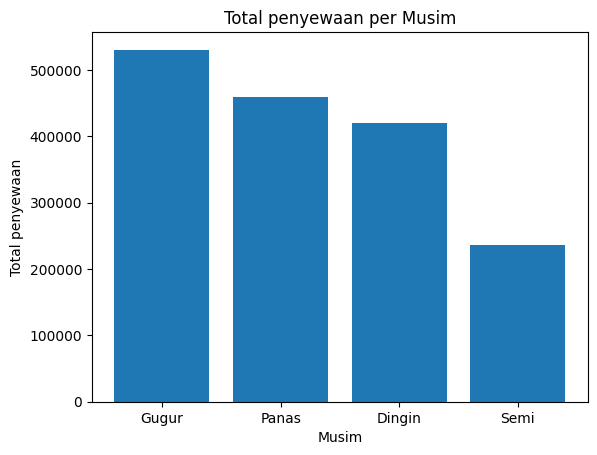

In [19]:
# inisialisi data untuk grafik
data = day_df.groupby(by="musim").total.sum().sort_values(ascending=False).reset_index().head(10)

# Membuat grafik barchart
data['total'] = [x/2 for x in data['total']]
plt.bar(data['musim'], data['total'])

# Memberikan judul dan label sumbu
plt.title('Total penyewaan per Musim')
plt.xlabel('Musim')
plt.ylabel('Total penyewaan')

# Menampilkan grafik
plt.show()

### Pertanyaan 2

Bagaimana jumlah pengguna sepeda pada tahun 2011, meningkat atau menurun ?

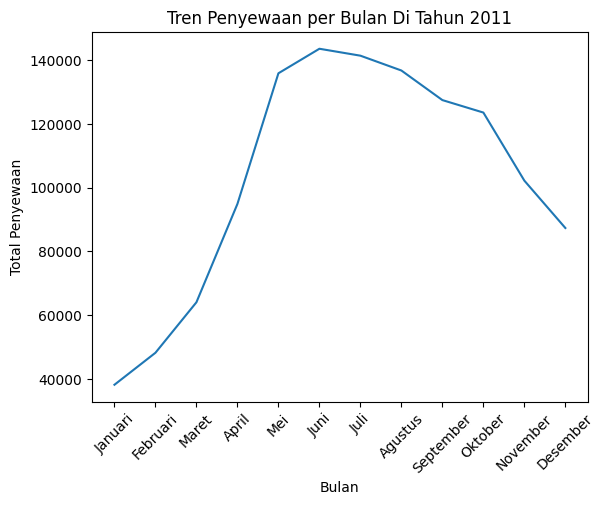

In [20]:
# Memfilter data untuk tahun 2011
day_df_2011 = day_df[day_df["tahun"] == "2011"]

# inisialisi data untuk grafik
data_bulan = day_df_2011.groupby(by="bulan").total.sum().reset_index().head(12)

# Mengurutkan bulan dengan urutan kalender
bulan_order = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
               'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

data_bulan['bulan'] = pd.Categorical(data_bulan['bulan'], categories=bulan_order, ordered=True)
data_bulan = data_bulan.sort_values('bulan')

# Membuat grafik linechart
plt.plot(data_bulan['bulan'], data_bulan['total'])

# Memberikan judul dan label sumbu
plt.title('Tren Penyewaan per Bulan Di Tahun 2011')
plt.xlabel('Bulan')
plt.xticks(rotation=45)
plt.ylabel('Total Penyewaan')

# Menampilkan grafik   
plt.show() 

**Insight**
- Pada pertanyaan 1 bisa didapatkan insight, musim dengan tingkat penyewaan terendah daripada musim lainnya terdapat di musim semi
- Dipertayaan ke-dua insight yang bisa kita ambil, pada tahun 2011 tersebut mengalami peningkatan dijanuari sampai juni lalu mengalami penurunan sampai bulan desember

### Conclusion

- Conclusion pertanyaan 1
    <br> Musim dengan tingkat Penyewaan terendah terjadi pada musim semi, dengan total penyewaan yang paling rendah dibandingkan musim yang lain. Perbedaan yang sangat signifikan terjadi karena kemungkinan orang eropa banyak yang alergi pada musim semi dan faktor - faktor lainnya. Untuk meningkatkan penyewaan di musim semi, harus meningkatkan strategi pemasaran yang lebih efektif, seperti promosi dan penyusuaian produk.


- Conclusion pertanyaan 2
    <br> Terjadi peningkatan yang signifikan dalam penyewaan dari bulan januari hingga juni, dengan puncaknya terjadi dibulan juni. Ini menunjukan adanya tren penyewaan yang kuat diparuh pertama tahun. Setelah mencapai puncak pada bulan juni, penyewaan mulai menurun dari bulan juli hingga desember. Penurunan ini mungkin disebabkan pengaruh musiman yang menyebabkan penurunan penyewaan.